In [10]:
import numpy as np#libreria que facilita operaciones de vectores y matrices

def sigmoid(x):#funcion que recibe un parametro y devuelve el valor sigmoidal del parametro
    return 1.0/(1.0 + np.exp(-x))#se calcula y retorna el valor sigmoidal del parametro

def sigmoid_derivada(x):#funcion que recibe un  valor sigmoidal y devuelve su derivada
    return sigmoid(x)*(1.0-sigmoid(x))#calcula la derivada y la retorna

def tanh(x):#funcion que recibe un parametro y devuelve la tangente hiperbolica
    return np.tanh(x)#funcion de numpy que calcula la tangente hiperbolica y la retorna

def tanh_derivada(x):#funcion que recibe la tangente hiperbolica y regresa su derivada
    return 1.0 - x**2#se calcula y retorna la derivada de la tangente hiperbolica


class NeuralNetwork:#se define la clase NeuralNetwork

    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':#si la funcion de activacion es sigmoide
            self.activation = sigmoid#entonces utiliza sigmoide
            self.activation_prime = sigmoid_derivada#y calcula su derivada
        elif activation == 'tanh':#sino y si es tanh
            self.activation = tanh#entonces utiliza la tangente hiperbolica
            self.activation_prime = tanh_derivada#y calula su derivada

        # declara los pesos
        self.weights = []#vector que contendra los pesos: fuerza de union entre las neuronas 
        self.deltas = []#vector que contendra las deltas: modificación en el peso simpátrico de un nodo es igual a la multiplicación del error y la entrada.
        # capas = [2,3,2]
        # rango de pesos varia entre (-1,1)
        # asigno valores aleatorios a capa de entrada y capa oculta
        
        for i in range(1, len(layers) - 1):#tantas veces como capas existan
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1#calculo alearorio los pesos para la posicion anterior
            self.weights.append(r)#se añaden al vector weights
        # asigno aleatorios a capa de salida
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1#para la posicion actual
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):#funcion que entrenara el algoritmo
        # Agrego columna de unos a las entradas X
        # Con esto agregamos la unidad de Bias a la capa de entrada
        ones = np.atleast_2d(np.ones(X.shape[0]))#arreglo de almenos dos dimensiones con unos
        X = np.concatenate((ones.T, X), axis=1)#se concatenan los unos en una matriz
        
        for k in range(epochs):#se repite tantas veces como epocas existan
            i = np.random.randint(X.shape[0])#se obtienen enteros aleatorios
            a = [X[i]]#se almacenan en X y a su vez en a

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])#se calcula el producto escalar de las dos matrices
                    activation = self.activation(dot_value)#se calcula la tangente hiperbolica del producto escalar
                    a.append(activation)#y se anexa al arreglo a
            # Calculo la diferencia en la capa de salida y el valor obtenido
            #las deltas se calculan multiplicando el error y la entrada
            error = y[i] - a[-1]#se calcula el error
            deltas = [error * self.activation_prime(a[-1])]#se multiplica por la entrada
            
            # Empezamos en el segundo layer hasta el ultimo
            # (Una capa anterior a la de salida)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)#se añade  lo anterior al arreglo deltas

            # invertir
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiplcar los delta de salida con las activaciones de entrada 
            #    para obtener el gradiente del peso.
            # 2. actualizo el peso restandole un porcentaje del gradiente
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: print('epochs:', k)

    def predict(self, x): #funcion para predecir
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

    def print_weights(self):#funcion para imprimir los pesos
        print("LISTADO PESOS DE CONEXIONES")
        for i in range(len(self.weights)):
            print(self.weights[i])

    def get_deltas(self):#funcion para imprmir las deltas
        return self.deltas

In [2]:
# funcion Coche Evita obstáculos
nn = NeuralNetwork([2,3,2],activation ='tanh')#dos neuronas de entrada tres capas ocultas y dos de salida
X = np.array([[0, 0],   # sin obstaculos
              [0, 1],   # sin obstaculos a la derecha
              [0, -1],  # sin obstaculos a la izquierda
              [0.5, 1], # obstaculo detectado a derecha
              [0.5,-1], # obstaculo a izq
              [1,1],    # demasiado cerca a derecha
              [1,-1]])  # demasiado cerca a izq

y = np.array([[0,1],    # avanzar
              [0,1],    # avanzar
              [0,1],    # avanzar
              [-1,1],   # giro izquierda
              [1,1],    # giro derecha
              [0,-1],   # retroceder
              [0,-1]])  # retroceder
nn.fit(X, y, learning_rate=0.03,epochs=15001)

index=0
for e in X:
    print("X:",e,"y:",y[index],"Network:",nn.predict(e))
    index=index+1

epochs: 0
epochs: 10000
X: [0. 0.] y: [0 1] Network: [-0.00406081  0.99998847]
X: [0. 1.] y: [0 1] Network: [-8.92576741e-04  9.99989418e-01]
X: [ 0. -1.] y: [0 1] Network: [0.00145909 0.99988429]
X: [0.5 1. ] y: [-1  1] Network: [-0.92712553  0.94670876]
X: [ 0.5 -1. ] y: [1 1] Network: [0.96042211 0.96684847]
X: [1. 1.] y: [ 0 -1] Network: [-0.01458449 -0.9497266 ]
X: [ 1. -1.] y: [ 0 -1] Network: [ 0.00272708 -0.98815981]


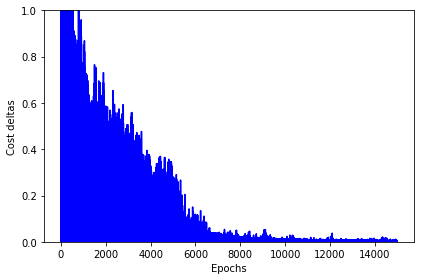

In [11]:
import matplotlib.pyplot as plt

deltas = nn.get_deltas()
valores=[]
index=0
for arreglo in deltas:
    valores.append(arreglo[1][0] + arreglo[1][1])
    index=index+1

plt.plot(range(len(valores)), valores, color='b')
plt.ylim([0, 1])
plt.ylabel('Cost deltas')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()